In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\MADYMA\Desktop\Data\FEDFUNDS.csv')
df1 = pd.read_csv(r'C:\Users\MADYMA\Desktop\Data\CPI.csv')

# Setting the date as the index
df.set_index('DATE',inplace=True)
df1.set_index('DATE',inplace=True)

# Converting the index to a date
df.index = pd.to_datetime(df.index)
df1.index = pd.to_datetime(df1.index)

# Setting the seaborn style
sns.set(style='darkgrid', palette='deep')

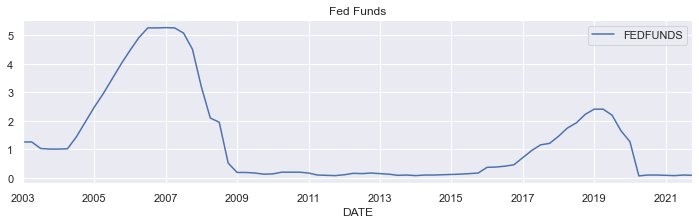

In [3]:
# Plot the data
df.plot(title="Fed Funds", figsize=(12, 3))

# Fit the model (a switching mean is the default of the MarkovRegession model)
mod_fedfunds = sm.tsa.MarkovRegression(df, k_regimes=2, freq='QS')
res_fedfunds = mod_fedfunds.fit();

In [4]:
# The constant represents the % likelyhood we will be in a high or low state. % likelyhood is measured by the P-values
res_fedfunds.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:               FEDFUNDS   No. Observations:                   76
Model:               MarkovRegression   Log Likelihood                 -96.401
Date:                Thu, 31 Mar 2022   AIC                            202.802
Time:                        10:02:10   BIC                            214.455
Sample:                    01-01-2003   HQIC                           207.459
                         - 10-01-2021                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6765      0.100      6.764      0.000       0.480       0.873
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3953      0.250     17.588      0.000       3.906       4.885
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.6066      0.100      6.068      0.000       0.411       0.803
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9861      0.014     70.349      0.000       0.959       1.014
p[1->0]        0.0908      0.078      1.159      0.247      -0.063       0.244
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

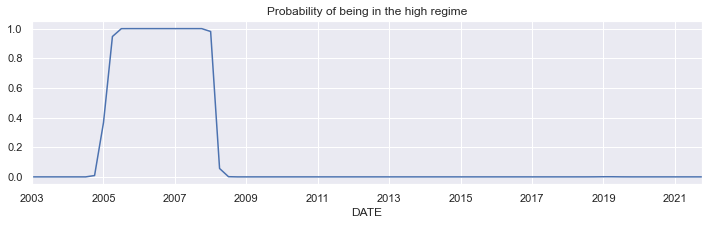

In [5]:
# Represents the probabilities.
res_fedfunds.smoothed_marginal_probabilities[1].plot(title="Probability of being in the high regime", figsize=(12, 3));

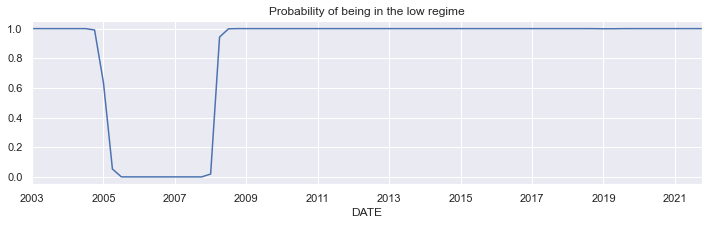

In [6]:
# Represents the probabilities.
res_fedfunds.smoothed_marginal_probabilities[0].plot(title="Probability of being in the low regime", figsize=(12, 3));

In [7]:
# Probability of being in a low vol state vs high vol. Data is in quarters.
print(res_fedfunds.expected_durations)

[71.90514827 11.01146176]


In [8]:
# Let's use a lagged indicator.
mod_fedfunds2 = sm.tsa.MarkovRegression(df.iloc[1:], k_regimes=2, exog=df.iloc[:-1], freq='QS')
res_fedfunds2 = mod_fedfunds2.fit()

In [9]:
# AIC and BIC have lowered which is good for the fit of the model. Regimes have changed with the first state high vol and the second low.
res_fedfunds2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:               FEDFUNDS   No. Observations:                   75
Model:               MarkovRegression   Log Likelihood                 -22.062
Date:                Thu, 31 Mar 2022   AIC                             58.125
Time:                        10:02:10   BIC                             74.347
Sample:                    04-01-2003   HQIC                            64.602
                         - 10-01-2021                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0967      0.111      0.873      0.383      -0.120       0.314
x1             0.1520      0.155      0.980      0.327      -0.152       0.456
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0591      0.055      1.077      0.282      -0.048       0.167
x1             0.9779      0.023     42.093      0.000       0.932       1.023
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0853      0.014      6.045      0.000       0.058       0.113
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.7171      0.502      1.427      0.153      -0.268       1.702
p[1->0]        0.0487      0.035      1.374      0.169      -0.021       0.118
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

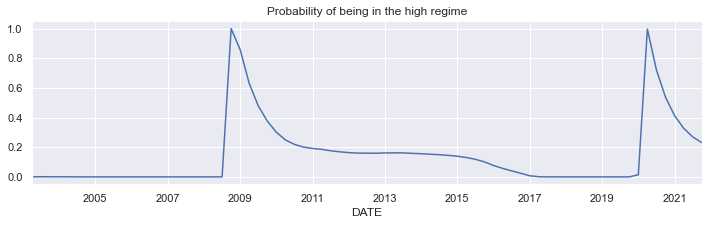

In [10]:
res_fedfunds2.smoothed_marginal_probabilities[0].plot(title="Probability of being in the high regime", figsize=(12, 3));

In [11]:
# Shrinkage of how many quarters.
print(res_fedfunds2.expected_durations)

[ 3.53421061 20.52648019]


In [12]:
# Let's add in another element which is inflation
exog = pd.concat((df.shift(), df1), axis=1).iloc[4:]

# Fit the 2-regime model
mod_fedfunds3 = sm.tsa.MarkovRegression(df.iloc[4:], k_regimes=2, exog=exog, freq='QS')
res_fedfunds3 = mod_fedfunds3.fit()

# Fit the 3-regime model
np.random.seed(12345)
mod_fedfunds4 = sm.tsa.MarkovRegression(df.iloc[4:], k_regimes=3, exog=exog, freq='QS')
res_fedfunds4 = mod_fedfunds4.fit(search_reps=20)

C:\Users\MADYMA\Anaconda3\lib\site-packages\statsmodels\tsa\regime_switching\markov_switching.py:1283: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  warnings.warn('Invalid regime transition probabilities'
C:\Users\MADYMA\Anaconda3\lib\site-packages\statsmodels\tsa\regime_switching\markov_switching.py:1283: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  warnings.warn('Invalid regime transition probabilities'
C:\Users\MADYMA\Anaconda3\lib\site-packages\statsmodels\tsa\regime_switching\markov_switching.py:1283: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  warnings.warn('Invalid regime transition probabilities'
C:\Users\MADYMA\Anaconda3\lib\site-packages\statsmodels\tsa\regime_switching\markov_s

In [17]:
# Two Factor
res_fedfunds3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:               FEDFUNDS   No. Observations:                   72
Model:               MarkovRegression   Log Likelihood                 -17.125
Date:                Thu, 31 Mar 2022   AIC                             52.251
Time:                        10:04:19   BIC                             72.741
Sample:                    01-01-2004   HQIC                            60.408
                         - 10-01-2021                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2015      0.360      0.559      0.576      -0.505       0.907
x1             0.1019      0.210      0.486      0.627      -0.309       0.513
x2            -0.0444      0.162     -0.274      0.784      -0.361       0.273
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0151      0.390     -2.605      0.009      -1.779      -0.251
x1             0.8684      0.036     23.875      0.000       0.797       0.940
x2             0.6468      0.203      3.187      0.001       0.249       1.045
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0734      0.013      5.540      0.000       0.047       0.099
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9539      0.035     27.047      0.000       0.885       1.023
p[1->0]        0.0426      0.032      1.328      0.184      -0.020       0.106
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [20]:
# Three Factor
res_fedfunds4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:               FEDFUNDS   No. Observations:                   72
Model:               MarkovRegression   Log Likelihood                  45.792
Date:                Thu, 31 Mar 2022   AIC                            -59.583
Time:                        10:19:52   BIC                            -23.157
Sample:                    01-01-2004   HQIC                           -45.082
                         - 10-01-2021                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9690      0.123     -7.868      0.000      -1.210      -0.728
x1             0.9005      0.014     66.279      0.000       0.874       0.927
x2             0.6710      0.067     10.029      0.000       0.540       0.802
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2539      0.106     -2.391      0.017      -0.462      -0.046
x1             0.8709      0.016     54.776      0.000       0.840       0.902
x2             0.1265      0.050      2.543      0.011       0.029       0.224
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3505      0.111    -12.141      0.000      -1.568      -1.132
x1             0.8558      0.063     13.647      0.000       0.733       0.979
x2             0.2943      0.103      2.857      0.004       0.092       0.496
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0079      0.001      5.914      0.000       0.005       0.011
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9188        nan        nan        nan         nan         nan
p[1->0]        0.0446      0.033      1.342      0.179      -0.021       0.110
p[2->0]        0.0002      1.241      0.000      1.000      -2.432       2.432
p[0->1]        0.0812      0.086      0.949      0.342      -0.086       0.249
p[1->1]        0.8780      0.053     16.532      0.000       0.774       0.982
p[2->1]        0.7538      0.973      0.775      0.439      -1.154       2.661
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

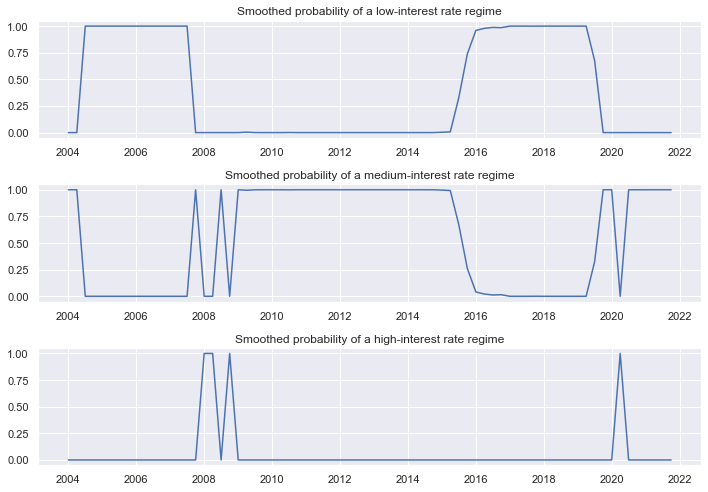

In [18]:
fig, axes = plt.subplots(3, figsize=(10, 7))

ax = axes[0]
ax.plot(res_fedfunds4.smoothed_marginal_probabilities[0])
ax.set(title="Smoothed probability of a low-interest rate regime")

ax = axes[1]
ax.plot(res_fedfunds4.smoothed_marginal_probabilities[1])
ax.set(title="Smoothed probability of a medium-interest rate regime")

ax = axes[2]
ax.plot(res_fedfunds4.smoothed_marginal_probabilities[2])
ax.set(title="Smoothed probability of a high-interest rate regime")

fig.tight_layout()

In [19]:
# Interseting
print(res_fedfunds4.expected_durations)

[12.31055098  8.19624227  1.32627974]
